In [57]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import pandas as pd

from matplotlib import pyplot as plt

In [62]:
df = pd.read_csv("/home/ubuntu/sandbox/Arun/Regression/house_prices.csv")
X = df[["SqFt",'Bedrooms','Bathrooms','Offers','Brick', 'Neighborhood']]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=44)
print(df.head())

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2   yes         East
1     2  114200  2030         4          2       3   yes         East
2     3  114800  1740         3          2       1   yes         East
3     4   94700  1980         3          2       3   yes         East
4     5  119800  2130         3          3       3   yes         East


In [52]:
numeric_features = ['SqFt', 'Bedrooms','Bathrooms','Offers']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Brick', 'Neighborhood']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [53]:

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

clf.fit(X_train, y_train)

print("model score: %.3f" % clf.score(X_train, y_train))
print("model score: %.3f" % clf.score(X_test, y_test))



model score: 0.863
model score: 0.877


In [54]:

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('feature_selection', SelectFromModel(LassoCV())),
                      ('regressor', LinearRegression())])



clf.fit(X_train, y_train)

print("model score: %.3f" % clf.score(X_train, y_train))
print("model score: %.3f" % clf.score(X_test, y_test))




model score: 0.863
model score: 0.876


In [60]:
pred =clf.predict(X_test)
pred_train = clf.predict(X_train)

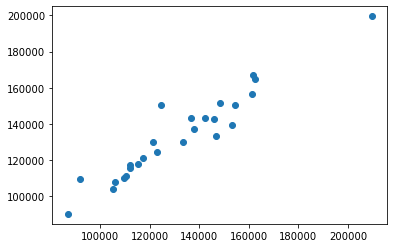

In [59]:
plt.scatter(pred, y_test)

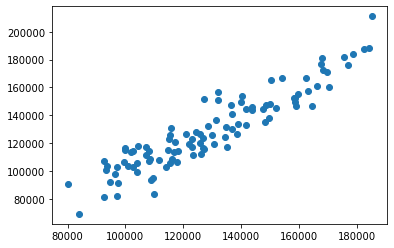

In [61]:
plt.scatter(pred_train, y_train)